### Importing Important Libraries

In [11]:
# pip install openpyxl


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Add the scripts folder to the system path so we can import time_series.py
import sys
import os
from scipy.stats import zscore
# for a folder that contain scripts for modularity 
sys.path.append(os.path.abspath('../scripts'))
sys.path.append(os.path.abspath('../src')) 
from preprocessing import NoiseHandling
from data_loader import FileLoader
from path import FilePathManager
from connection import Db_Connection
from eda import EDA
from user_overview_analysis import UserOverviewAnalysis
from user_engagement_analysis import user_engagement_analysis
from user_satisfaction_analysis import UserSatisfactionAnalysis
from plot import Plot

In [2]:
# Create an instance of the class
file_manager = FilePathManager()

# Retrieve the file paths
file_paths = file_manager.get_file_paths()
file_name = file_manager.get_file_name()

# Initialize the loader with the file paths
loader = FileLoader(file_paths)

# Load all files
loader.load_files()

# Access individual DataFrames by file name
df = loader.get_dataframe(file_name[0])
df_desc = loader.get_dataframe(file_name[1])

In [25]:
df_desc

,Fields,Description
0,bearer id,xDr session identifier
1,Dur. (ms),Total Duration of the xDR (in ms)
2,Start,Start time of the xDR (first frame timestamp)
3,Start ms,Milliseconds offset of start time for the xDR ...
4,End,End time of the xDR (last frame timestamp)
5,End ms,Milliseconds offset of end time of the xDR (la...
6,Dur. (s),Total Duration of the xDR (in s)
7,IMSI,International Mobile Subscriber Identity
8,MSISDN/Number,MS International PSTN/ISDN Number of mobile - ...
9,IMEI,International Mobile Equipment Identity


### Explanatory Data Analysis

In [3]:
# Create an instance of the EDA class
eda = EDA(df)

# Display the top 5 rows
top_n = eda.display_top_n(5)
top_n

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [4]:
eda.display_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [16]:
eda.display_description()

,count,mean,std,min,25%,50%,75%,max
Bearer Id,149010.0,1.013887e+19,2.893173e+18,6.917538e+18,7.349883e+18,7.349883e+18,1.304243e+19,1.318654e+19
Start ms,150000.0,4.991882e+02,2.886118e+02,0.000000e+00,2.500000e+02,4.990000e+02,7.490000e+02,9.990000e+02
End ms,150000.0,4.988009e+02,2.880977e+02,0.000000e+00,2.510000e+02,5.000000e+02,7.500000e+02,9.990000e+02
Dur. (ms),150000.0,1.046086e+05,8.103762e+04,7.142000e+03,5.744050e+04,8.639900e+04,1.324302e+05,1.859336e+06
IMSI,149431.0,2.082016e+14,2.148809e+10,2.040471e+14,2.082014e+14,2.082015e+14,2.082018e+14,2.140743e+14
MSISDN/Number,148935.0,4.188282e+10,2.447443e+12,3.360100e+10,3.365130e+10,3.366371e+10,3.368349e+10,8.823971e+14
IMEI,149429.0,4.847455e+13,2.241637e+13,4.400152e+11,3.546071e+13,3.572201e+13,8.611970e+13,9.900120e+13
Avg RTT DL (ms),122172.0,1.097957e+02,6.197827e+02,0.000000e+00,3.200000e+01,4.500000e+01,7.000000e+01,9.692300e+04
Avg RTT UL (ms),122189.0,1.766288e+01,8.479352e+01,0.000000e+00,2.000000e+00,5.000000e+00,1.500000e+01,7.120000e+03
Avg Bearer TP DL (kbps),150000.0,1.330005e+04,2.397188e+04,0.000000e+00,4.300000e+01,6.300000e+01,1.971075e+04,3.781600e+05


### Identify and Handle Missing values 

In [17]:
eda.check_null_values()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

### Here is the code that checks columns that have very small missing values 

In [5]:
# Use the first method with custom min and max values
columns_with_few_nulls, rows_with_missing_values = NoiseHandling.check_missed_greater_than_3(df, min_value=0, max_value=2)
print("Columns with few nulls:", columns_with_few_nulls)
rows_with_missing_values

Total Number of columns that have missing value > 0 and < 2 is equal to: 12
Columns with few nulls: ['Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1', 'Total UL (Bytes)', 'Total DL (Bytes)']


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
150000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,NaN,NaN


#### When I observe it must of the records are miss so inputing these value has no siginificance so I will drop those rows 

In [6]:
# Use the second method to drop rows with missing values in a specific column
df = NoiseHandling.handling_cols_with_missed_values_less_than_3(df, column_names=columns_with_few_nulls)

Dropping rows with missing values in columns: ['Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1', 'Total UL (Bytes)', 'Total DL (Bytes)']


In [20]:
df.isna().sum()

Bearer Id                                      990
Start                                            0
Start ms                                         0
End                                              0
End ms                                           0
Dur. (ms)                                        0
IMSI                                           569
MSISDN/Number                                 1065
IMEI                                           571
Last Location Name                            1152
Avg RTT DL (ms)                              27828
Avg RTT UL (ms)                              27811
Avg Bearer TP DL (kbps)                          0
Avg Bearer TP UL (kbps)                          0
TCP DL Retrans. Vol (Bytes)                  88145
TCP UL Retrans. Vol (Bytes)                  96648
DL TP < 50 Kbps (%)                            753
50 Kbps < DL TP < 250 Kbps (%)                 753
250 Kbps < DL TP < 1 Mbps (%)                  753
DL TP > 1 Mbps (%)             

#### Now also when I observe Null value the first column which is uniquly identifies the records that I couldn't replace with any value, so I deciede to drop that column missing value rows too

In [7]:
# Use the second method to drop rows with missing values in a specific column
df = NoiseHandling.handling_cols_with_missed_values_less_than_3(df, column_names=['Bearer Id'])

Dropping rows with missing values in columns: ['Bearer Id']


In [8]:
null_columns_greater_than_2 =  df.columns[(df.isnull().sum() > 0)]
print(f"I have {len(null_columns_greater_than_2)} columns that Have missing value greater than 2")

I have 28 columns that Have missing value greater than 2


In [23]:
df[null_columns_greater_than_2].isna().sum()

IMSI                                             9
MSISDN/Number                                  504
IMEI                                            11
Last Location Name                             162
Avg RTT DL (ms)                              27685
Avg RTT UL (ms)                              27666
TCP DL Retrans. Vol (Bytes)                  87906
TCP UL Retrans. Vol (Bytes)                  96368
DL TP < 50 Kbps (%)                            716
50 Kbps < DL TP < 250 Kbps (%)                 716
250 Kbps < DL TP < 1 Mbps (%)                  716
DL TP > 1 Mbps (%)                             716
UL TP < 10 Kbps (%)                            770
10 Kbps < UL TP < 50 Kbps (%)                  770
50 Kbps < UL TP < 300 Kbps (%)                 770
UL TP > 300 Kbps (%)                           770
HTTP DL (Bytes)                              81228
HTTP UL (Bytes)                              81578
Handset Manufacturer                            11
Handset Type                   

In [9]:
# Find rows where null values exist in the specified columns and in the 'IMSI'
filtered_rows = df[df[null_columns_greater_than_2].isnull().any(axis=1) & df['IMSI'].isnull()]
filtered_rows2 = df[df[null_columns_greater_than_2].isnull().any(axis=1) & df['IMEI'].isnull()]
# Display the filtered rows
filtered_rows2


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
21832,6.917538e+18,4/24/2019 20:26,736.0,4/25/2019 0:14,1.0,13666.0,NaN,NaN,NaN,U14936A,...,20747429.0,21022153.0,5246185.0,17407945.0,812195002.0,13334794.0,462764262.0,5997128.0,60679021.0,844371851.0
24413,6.917538e+18,4/24/2019 20:58,125.0,4/24/2019 23:35,994.0,9460.0,NaN,NaN,NaN,G56560A,...,1712095.0,4735960.0,1849343.0,13887683.0,54277434.0,694630.0,779382238.0,7240687.0,28222264.0,72444302.0
24802,1.268214e+19,4/24/2019 21:02,478.0,4/25/2019 2:55,997.0,21231.0,NaN,NaN,NaN,G15451C,...,8077188.0,14218592.0,6581163.0,9334994.0,592935106.0,8662570.0,31148323.0,14575026.0,50670513.0,614648963.0
58263,6.917538e+18,4/25/2019 23:05,714.0,4/26/2019 23:11,12.0,86782.0,2.082095e+14,NaN,NaN,U74261B,...,1215176.0,6041132.0,1418313.0,5665048.0,596717529.0,8854054.0,642690544.0,11469281.0,34369618.0,611874376.0
79882,6.917538e+18,4/27/2019 7:44,593.0,4/27/2019 23:11,529.0,55575.0,2.082095e+14,NaN,NaN,W21110C,...,17202372.0,21288822.0,19270040.0,3265093.0,62871774.0,11659446.0,618554992.0,15807139.0,55218094.0,106751651.0
89902,6.917538e+18,4/27/2019 14:12,749.0,4/28/2019 4:59,548.0,53166.0,NaN,NaN,NaN,G83959A,...,19555096.0,18356401.0,22998366.0,5954544.0,789043081.0,2146033.0,136404035.0,13166703.0,43611695.0,835036607.0
91249,6.917538e+18,4/27/2019 14:45,42.0,4/28/2019 3:25,936.0,45594.0,NaN,NaN,NaN,U85956A,...,16915430.0,12855726.0,14508191.0,19752864.0,501514849.0,1942936.0,55238293.0,959225.0,36860865.0,540674358.0
116576,1.268214e+19,4/28/2019 1:34,98.0,4/29/2019 1:27,862.0,85999.0,NaN,NaN,NaN,V70710B,...,647961.0,13367183.0,13169294.0,21395712.0,747309023.0,11095360.0,69922192.0,9953343.0,57425007.0,776762802.0
140112,6.917538e+18,4/29/2019 3:21,626.0,4/30/2019 2:56,432.0,84922.0,NaN,NaN,NaN,U73516A,...,4515779.0,10260059.0,11863799.0,3643319.0,38470041.0,12809993.0,584306684.0,16542040.0,46217890.0,63899854.0
141184,6.917538e+18,4/29/2019 3:56,245.0,4/30/2019 1:25,329.0,77313.0,NaN,NaN,NaN,U42171B,...,19094432.0,17771961.0,20495181.0,9063347.0,282473281.0,9427574.0,795082302.0,716697.0,39670202.0,329350746.0


In [27]:
filtered_rows

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
21832,6.917538e+18,4/24/2019 20:26,736.0,4/25/2019 0:14,1.0,13666.0,NaN,NaN,NaN,U14936A,...,20747429.0,21022153.0,5246185.0,17407945.0,812195002.0,13334794.0,462764262.0,5997128.0,60679021.0,844371851.0
24413,6.917538e+18,4/24/2019 20:58,125.0,4/24/2019 23:35,994.0,9460.0,NaN,NaN,NaN,G56560A,...,1712095.0,4735960.0,1849343.0,13887683.0,54277434.0,694630.0,779382238.0,7240687.0,28222264.0,72444302.0
24802,1.268214e+19,4/24/2019 21:02,478.0,4/25/2019 2:55,997.0,21231.0,NaN,NaN,NaN,G15451C,...,8077188.0,14218592.0,6581163.0,9334994.0,592935106.0,8662570.0,31148323.0,14575026.0,50670513.0,614648963.0
89902,6.917538e+18,4/27/2019 14:12,749.0,4/28/2019 4:59,548.0,53166.0,NaN,NaN,NaN,G83959A,...,19555096.0,18356401.0,22998366.0,5954544.0,789043081.0,2146033.0,136404035.0,13166703.0,43611695.0,835036607.0
91249,6.917538e+18,4/27/2019 14:45,42.0,4/28/2019 3:25,936.0,45594.0,NaN,NaN,NaN,U85956A,...,16915430.0,12855726.0,14508191.0,19752864.0,501514849.0,1942936.0,55238293.0,959225.0,36860865.0,540674358.0
116576,1.268214e+19,4/28/2019 1:34,98.0,4/29/2019 1:27,862.0,85999.0,NaN,NaN,NaN,V70710B,...,647961.0,13367183.0,13169294.0,21395712.0,747309023.0,11095360.0,69922192.0,9953343.0,57425007.0,776762802.0
140112,6.917538e+18,4/29/2019 3:21,626.0,4/30/2019 2:56,432.0,84922.0,NaN,NaN,NaN,U73516A,...,4515779.0,10260059.0,11863799.0,3643319.0,38470041.0,12809993.0,584306684.0,16542040.0,46217890.0,63899854.0
141184,6.917538e+18,4/29/2019 3:56,245.0,4/30/2019 1:25,329.0,77313.0,NaN,NaN,NaN,U42171B,...,19094432.0,17771961.0,20495181.0,9063347.0,282473281.0,9427574.0,795082302.0,716697.0,39670202.0,329350746.0
145353,1.268214e+19,4/29/2019 6:06,463.0,4/30/2019 6:06,466.0,86371.0,NaN,NaN,NaN,V77597B,...,8002890.0,13686058.0,15839616.0,12320580.0,587372924.0,5915899.0,635023826.0,7166394.0,40001641.0,618845424.0


After I observe the result of IMSI, MSISDN, and IMEI missed rows since these are critical for my analysis and even there's no feasible way to impute the missing values reliably, I can follow a method like forward or backward fill or mode mechanism 
while the records those have missed value after remoming unreplacable rows it is not a significance number it is arround 9. As well when observe it I got three column values are missed so what I decied is removing rows with missing values the best option for this case too.

In [10]:
# Drop rows where all specified columns are NaN
columns_to_check = ['IMSI', 'IMEI', 'MSISDN/Number']
df = NoiseHandling.common_missed_of_subscribers(df, column_names=columns_to_check)

Dropping rows where all of the following columns are missing: ['IMSI', 'IMEI', 'MSISDN/Number']


In [11]:
# Use the method to get columns with null values and their counts
missing_counts = NoiseHandling.null_columns_greater_than_0(df)
print("Missing values per column:\n", missing_counts)

(27,)
Missing values per column:
 MSISDN/Number                                  495
IMEI                                             2
Last Location Name                             162
Avg RTT DL (ms)                              27685
Avg RTT UL (ms)                              27666
TCP DL Retrans. Vol (Bytes)                  87906
TCP UL Retrans. Vol (Bytes)                  96368
DL TP < 50 Kbps (%)                            716
50 Kbps < DL TP < 250 Kbps (%)                 716
250 Kbps < DL TP < 1 Mbps (%)                  716
DL TP > 1 Mbps (%)                             716
UL TP < 10 Kbps (%)                            770
10 Kbps < UL TP < 50 Kbps (%)                  770
50 Kbps < UL TP < 300 Kbps (%)                 770
UL TP > 300 Kbps (%)                           770
HTTP DL (Bytes)                              81228
HTTP UL (Bytes)                              81578
Handset Manufacturer                             2
Handset Type                                    

In [12]:
# Find rows where IMSI has the same value as another row (including the first occurrence)
duplicate_rows = df[df['IMSI'].duplicated(keep=False)]

# Sort the duplicate rows in descending order (based on IMSI or another column)
duplicate_rows_sorted = duplicate_rows.sort_values(by='IMSI', ascending=False)
duplicate_rows_sorted.head(10)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
100000,1.311448e+19,4/9/2019 14:57,414.0,4/29/2019 1:34,128.0,1679813.0,2.082099e+14,3.376355e+10,3.534681e+13,T73670B,...,7725935.0,6547902.0,15286906.0,4138800.0,576169362.0,4962473.0,465550776.0,9629071.0,29396179.0,616799784.0
100001,1.311448e+19,4/10/2019 3:25,731.0,4/29/2019 1:35,828.0,1634983.0,2.082099e+14,3.376355e+10,3.534681e+13,T73670B,...,14174006.0,9543474.0,11965711.0,5578206.0,324097722.0,175327.0,208645371.0,12252382.0,31723203.0,356910231.0
922,1.304243e+19,4/24/2019 0:36,507.0,4/25/2019 0:36,507.0,86400.0,2.082099e+14,3.376355e+10,3.534681e+13,T73670B,...,14171064.0,17969140.0,17587261.0,13848108.0,627968339.0,15091927.0,541463155.0,13456536.0,61707527.0,667549401.0
35073,1.304243e+19,4/25/2019 0:37,736.0,4/26/2019 0:37,673.0,86399.0,2.082099e+14,3.376355e+10,3.534681e+13,T73670B,...,2608005.0,21288360.0,3635842.0,21626694.0,405336480.0,9423438.0,473194680.0,6111494.0,61338162.0,417888492.0
125490,1.311448e+19,4/26/2019 8:27,725.0,4/30/2019 9:03,491.0,347776.0,2.082099e+14,3.376028e+10,3.561421e+13,D74520B,...,22419655.0,17706491.0,2609118.0,16525840.0,137927491.0,13113177.0,7318020.0,6129257.0,55953452.0,170587102.0
73953,1.304243e+19,4/26/2019 8:59,104.0,4/27/2019 9:03,937.0,86663.0,2.082099e+14,3.376028e+10,3.561421e+13,L74520B,...,2201704.0,20237521.0,6923567.0,13389347.0,320292878.0,9122478.0,607034935.0,5053533.0,52785286.0,344925314.0
126124,1.311448e+19,4/27/2019 6:34,876.0,4/30/2019 9:03,491.0,268168.0,2.082099e+14,3.376028e+10,3.561421e+13,L74520B,...,19475763.0,3528408.0,5634954.0,18093545.0,606097758.0,6292260.0,275430829.0,11456898.0,41073898.0,635963320.0
47425,1.311448e+19,4/25/2019 7:26,740.0,4/26/2019 9:02,392.0,92194.0,2.082099e+14,3.365079e+10,8.601480e+13,L53511B,...,11970181.0,18580955.0,3208365.0,1652746.0,454323036.0,13543988.0,819566172.0,11085838.0,47792313.0,480954634.0
74807,1.311448e+19,4/26/2019 9:08,610.0,4/27/2019 17:34,445.0,116747.0,2.082099e+14,3.365079e+10,8.601480e+13,T11002B,...,9955581.0,20590753.0,507077.0,14615308.0,149996706.0,8658828.0,404325160.0,7309876.0,53725758.0,170371658.0
47423,1.304243e+19,4/25/2019 7:26,524.0,4/26/2019 7:26,487.0,86399.0,2.082099e+14,3.365079e+10,8.601480e+13,D53511B,...,20916267.0,2629566.0,7121992.0,2655156.0,128060029.0,12311376.0,797628131.0,5095590.0,26948253.0,166949095.0


From the above figure to replace missing values in the `MSISDN/Number` and `IMEI` columns, I use the `groupby('IMSI')` method followed by `transform(lambda x: x.fillna(method='pad'))`. This fills the `NaN` values within each group of the same `IMSI` with the previous available value from the same group. I observe that if there is a certain value of `IMSI` (x) and corresponding `MSISDN/Number` (z) and `IMEI` (w), then when the same `IMSI` value (x) appears again, the values for `MSISDN/Number` and `IMEI` are mostly `z` and `w` respectively. Instead of using `ffill`, `bfill`, or any statistical mechanism, it is better to use this method as it ensures missing values are replaced with data from the same group, preserving the integrity and consistency of the data. This approach is applied if it satisfied the condition 

In [13]:
# Call the method to fill the null values in 'MSISDN/Number' and 'IMEI'
df = NoiseHandling.fill_nulls_by_imsi_group(df)

Filling missing 'MSISDN/Number' and 'IMEI' by IMSI group...


c:\Users\Admin\10_Academy_AI_Mastery_kifiya_Week_2_v1\scripts\preprocessing.py:91: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['MSISDN/Number'] = df.groupby('IMSI')['MSISDN/Number'].transform(lambda x: x.fillna(method='pad'))
c:\Users\Admin\10_Academy_AI_Mastery_kifiya_Week_2_v1\scripts\preprocessing.py:94: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['IMEI'] = df.groupby('IMSI')['IMEI'].transform(lambda x: x.fillna(method='pad'))


In [32]:
null_columns_greater_than_0 =  df.columns[(df.isnull().sum() > 0)]
df[null_columns_greater_than_0].isna().sum()

MSISDN/Number                                  478
IMEI                                             2
Last Location Name                             162
Avg RTT DL (ms)                              27685
Avg RTT UL (ms)                              27666
TCP DL Retrans. Vol (Bytes)                  87906
TCP UL Retrans. Vol (Bytes)                  96368
DL TP < 50 Kbps (%)                            716
50 Kbps < DL TP < 250 Kbps (%)                 716
250 Kbps < DL TP < 1 Mbps (%)                  716
DL TP > 1 Mbps (%)                             716
UL TP < 10 Kbps (%)                            770
10 Kbps < UL TP < 50 Kbps (%)                  770
50 Kbps < UL TP < 300 Kbps (%)                 770
UL TP > 300 Kbps (%)                           770
HTTP DL (Bytes)                              81228
HTTP UL (Bytes)                              81578
Handset Manufacturer                             2
Handset Type                                     2
Nb of sec with 125000B < Vol DL

Base on this I replace `17` reords of `MSISDN/Number`

The `IMEI` (International Mobile Equipment Identity) is typically a unique identifier for devices, and if it's missing, it may imply that the device information is incomplete or unreliable. Since `IMEI` is unique to each device, imputing a missing `IMEI` could introduce significant errors. The best approach here is to `drop` the rows where `IMEI` is missing

In [14]:
df.dropna(subset=['IMEI'], inplace=True)

Filled with `Mode` value of `MSISDN/Number`

In [15]:
# Fill missing 'MSISDN/Number' with the most frequent value globally
mode_value = df['MSISDN/Number'].mode()[0]  # Get the most frequent value
df['MSISDN/Number'].fillna(mode_value, inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_3276\3501947776.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MSISDN/Number'].fillna(mode_value, inplace=True)


In [16]:
null_columns_greater_than_0 =  df.columns[(df.isnull().sum() > 0)]
df[null_columns_greater_than_0].isna().sum()

Last Location Name                             162
Avg RTT DL (ms)                              27685
Avg RTT UL (ms)                              27666
TCP DL Retrans. Vol (Bytes)                  87905
TCP UL Retrans. Vol (Bytes)                  96368
DL TP < 50 Kbps (%)                            716
50 Kbps < DL TP < 250 Kbps (%)                 716
250 Kbps < DL TP < 1 Mbps (%)                  716
DL TP > 1 Mbps (%)                             716
UL TP < 10 Kbps (%)                            770
10 Kbps < UL TP < 50 Kbps (%)                  770
50 Kbps < UL TP < 300 Kbps (%)                 770
UL TP > 300 Kbps (%)                           770
HTTP DL (Bytes)                              81228
HTTP UL (Bytes)                              81578
Nb of sec with 125000B < Vol DL              96996
Nb of sec with 1250B < Vol UL < 6250B        92445
Nb of sec with 31250B < Vol DL < 125000B     93158
Nb of sec with 37500B < Vol UL              129365
Nb of sec with 6250B < Vol DL <

In [36]:
df[null_columns_greater_than_0].describe().T

,count,mean,std,min,25%,50%,75%,max
Avg RTT DL (ms),121314.0,1.060919e+02,5.860876e+02,0.0,32.0,45.0,69.00,9.692300e+04
Avg RTT UL (ms),121333.0,1.766435e+01,8.487524e+01,0.0,2.0,5.0,15.00,7.120000e+03
TCP DL Retrans. Vol (Bytes),61094.0,2.094797e+07,1.828756e+08,2.0,35654.0,574681.0,3792938.25,4.294426e+09
TCP UL Retrans. Vol (Bytes),52631.0,7.688356e+05,2.663348e+07,1.0,4647.5,20996.0,84403.00,2.908226e+09
DL TP < 50 Kbps (%),148283.0,9.285634e+01,1.304006e+01,0.0,91.0,100.0,100.00,1.000000e+02
50 Kbps < DL TP < 250 Kbps (%),148283.0,3.059022e+00,6.207279e+00,0.0,0.0,0.0,4.00,9.300000e+01
250 Kbps < DL TP < 1 Mbps (%),148283.0,1.716346e+00,4.162173e+00,0.0,0.0,0.0,1.00,1.000000e+02
DL TP > 1 Mbps (%),148283.0,1.612275e+00,4.832124e+00,0.0,0.0,0.0,0.00,9.400000e+01
UL TP < 10 Kbps (%),148229.0,9.853084e+01,4.641498e+00,0.0,99.0,100.0,100.00,1.000000e+02
10 Kbps < UL TP < 50 Kbps (%),148229.0,7.768183e-01,3.228733e+00,0.0,0.0,0.0,0.00,9.800000e+01


In [17]:
# Identify columns with missing values
null_columns_greater_than_0 = df.columns[df.isnull().any()]

In [38]:
null_columns_greater_than_0

Index(['Last Location Name', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',
       'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B'],
      dtype='object')

### Visualization of Missing values

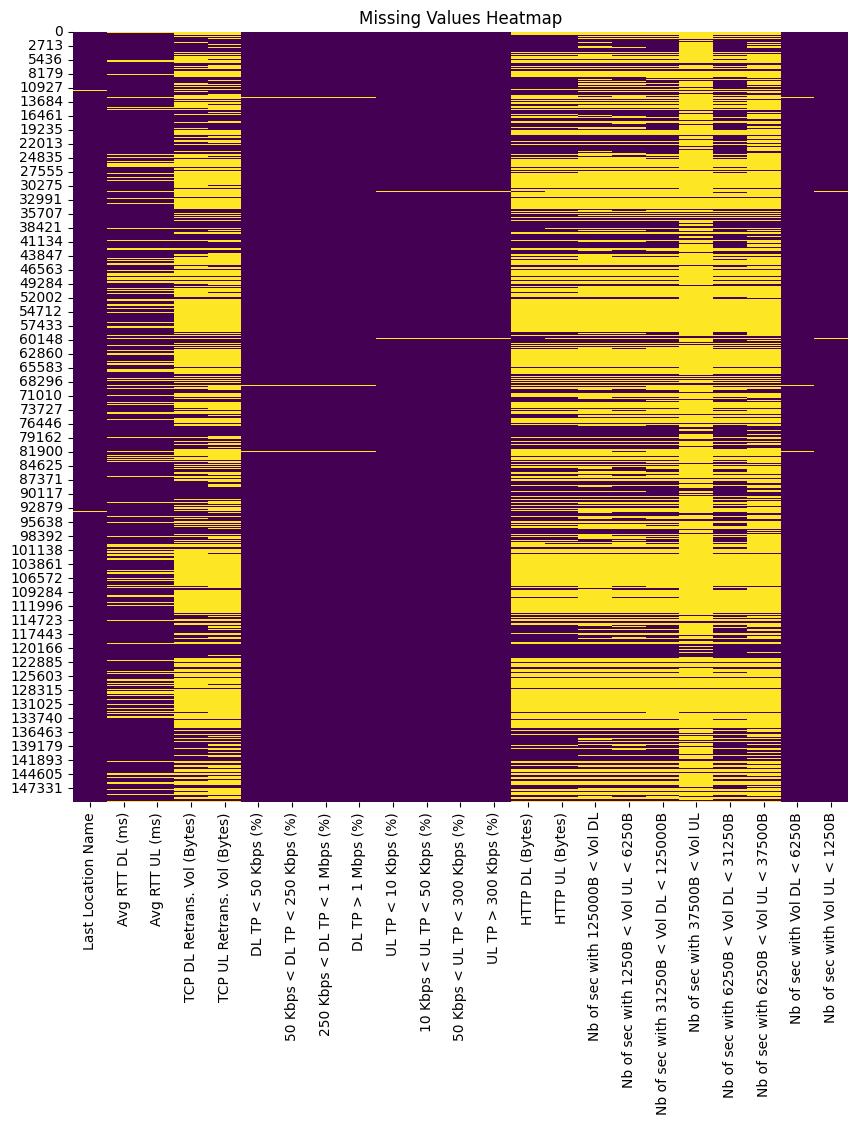

In [18]:
plot_missed = Plot(df)
plot_missed.plot_missing_values_heatmap(df[null_columns_greater_than_0])

#### Attributes of Missed value with There distribution

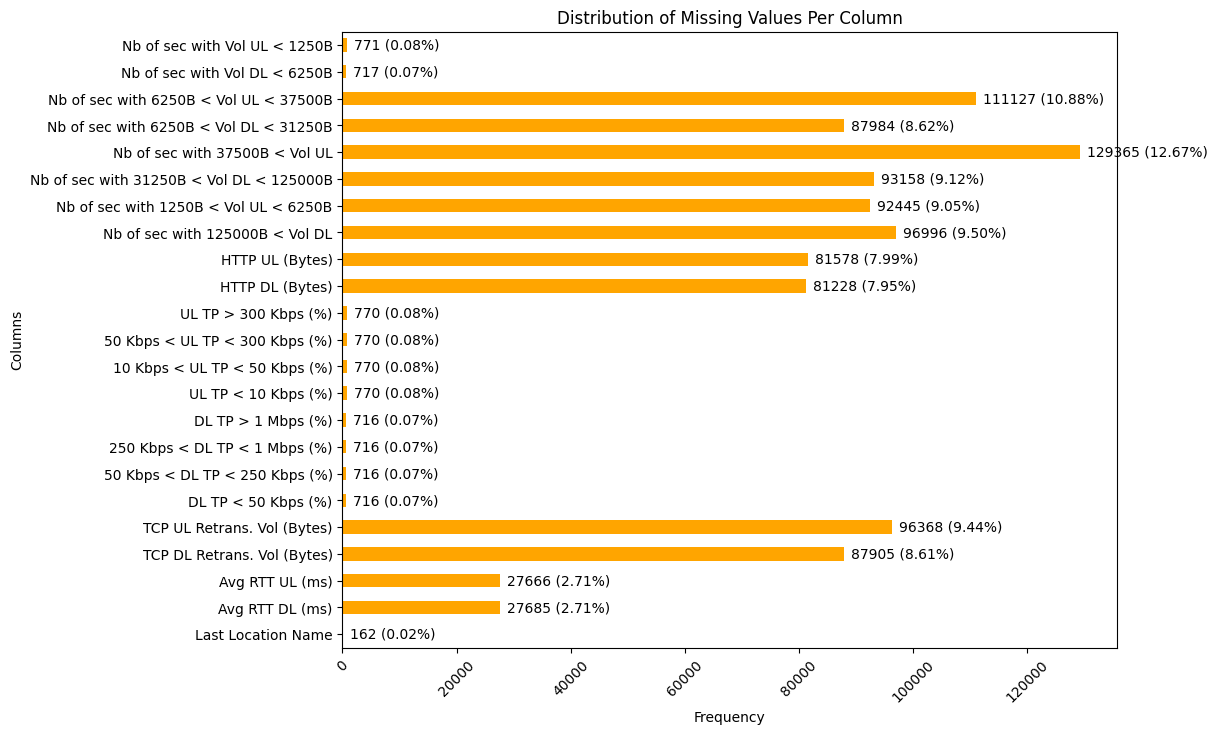

In [19]:
# Initialize the Plot class
plot_instance = Plot(df)
# Call the method to plot the distribution of missing values
plot_instance.distribution_of_missing_values(null_columns_greater_than_0)

In [20]:
plot = Plot(df)

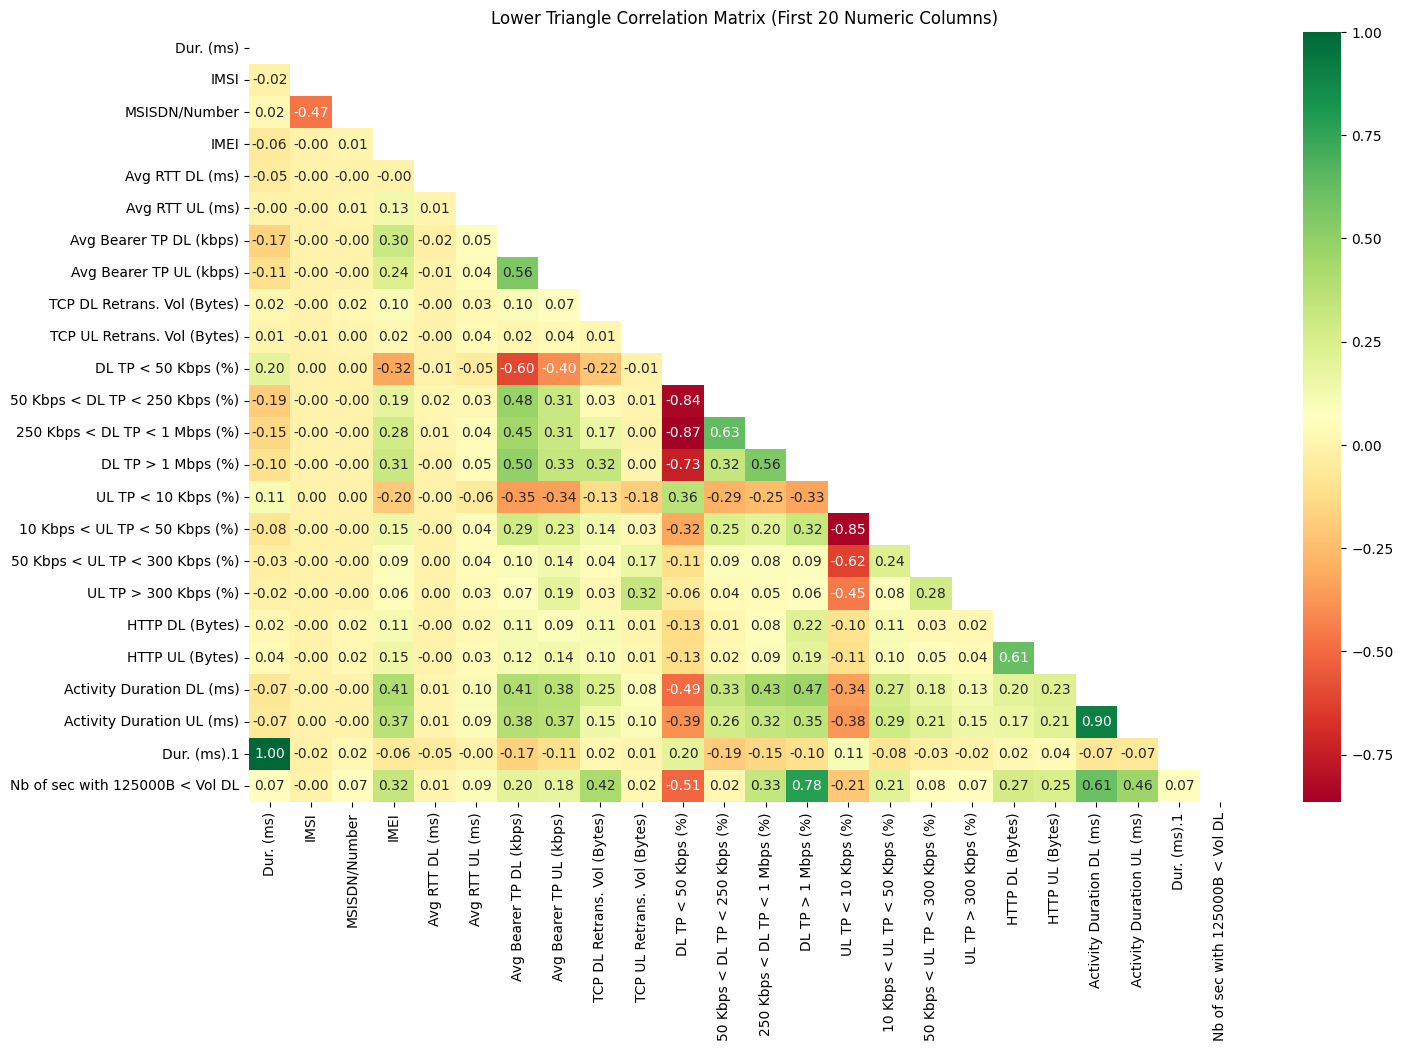

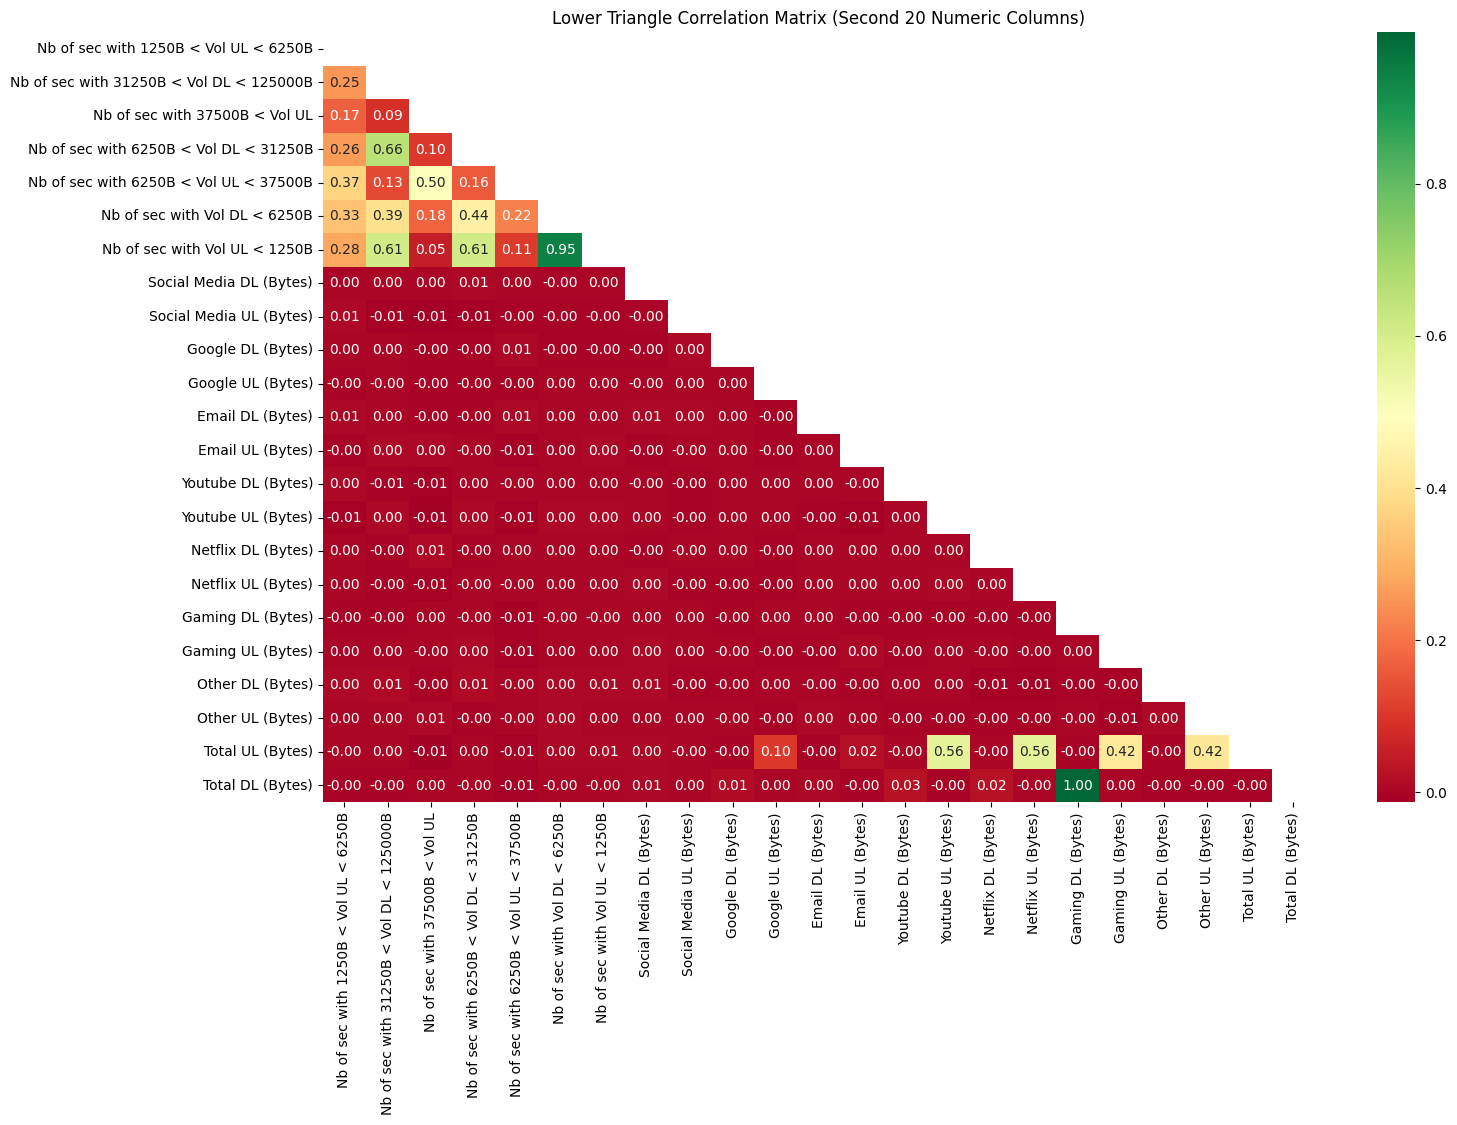

In [21]:
plot.analyze_correlation(df)

In [22]:
df[null_columns_greater_than_0].isna().sum()

Last Location Name                             162
Avg RTT DL (ms)                              27685
Avg RTT UL (ms)                              27666
TCP DL Retrans. Vol (Bytes)                  87905
TCP UL Retrans. Vol (Bytes)                  96368
DL TP < 50 Kbps (%)                            716
50 Kbps < DL TP < 250 Kbps (%)                 716
250 Kbps < DL TP < 1 Mbps (%)                  716
DL TP > 1 Mbps (%)                             716
UL TP < 10 Kbps (%)                            770
10 Kbps < UL TP < 50 Kbps (%)                  770
50 Kbps < UL TP < 300 Kbps (%)                 770
UL TP > 300 Kbps (%)                           770
HTTP DL (Bytes)                              81228
HTTP UL (Bytes)                              81578
Nb of sec with 125000B < Vol DL              96996
Nb of sec with 1250B < Vol UL < 6250B        92445
Nb of sec with 31250B < Vol DL < 125000B     93158
Nb of sec with 37500B < Vol UL              129365
Nb of sec with 6250B < Vol DL <

Skewness for First Group of Numeric Columns:
Dur. (ms)                        3.963365
IMSI                            40.987336
MSISDN/Number                  332.227215
IMEI                             1.070670
Avg RTT DL (ms)                 66.753873
Avg RTT UL (ms)                 28.498032
Avg Bearer TP DL (kbps)          2.587838
Avg Bearer TP UL (kbps)          4.499479
TCP DL Retrans. Vol (Bytes)     15.871616
dtype: float64


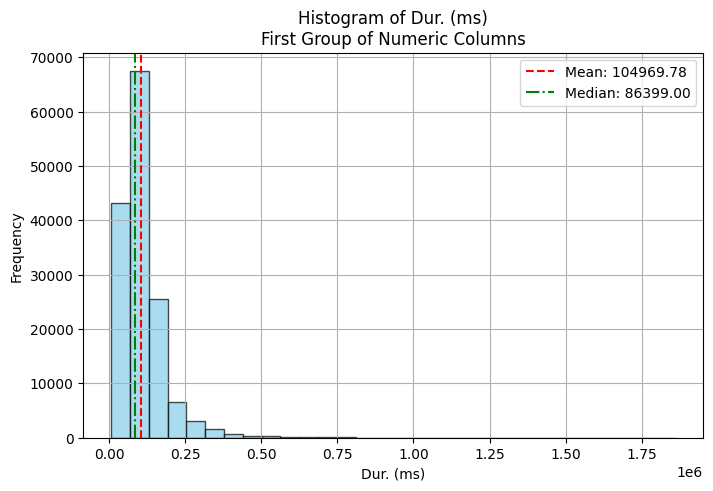

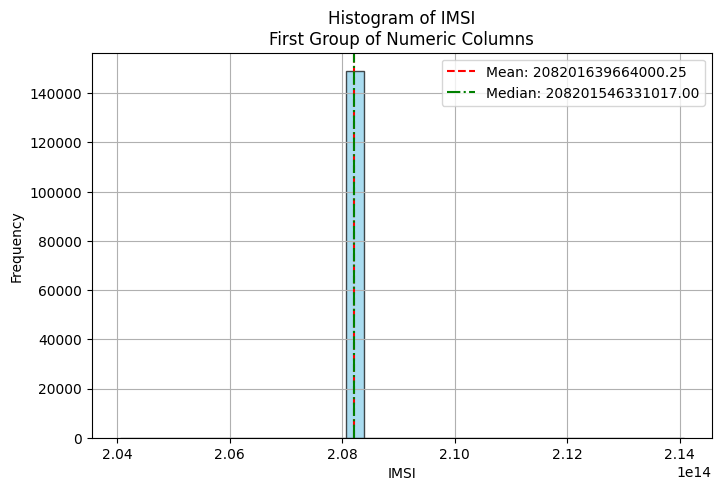

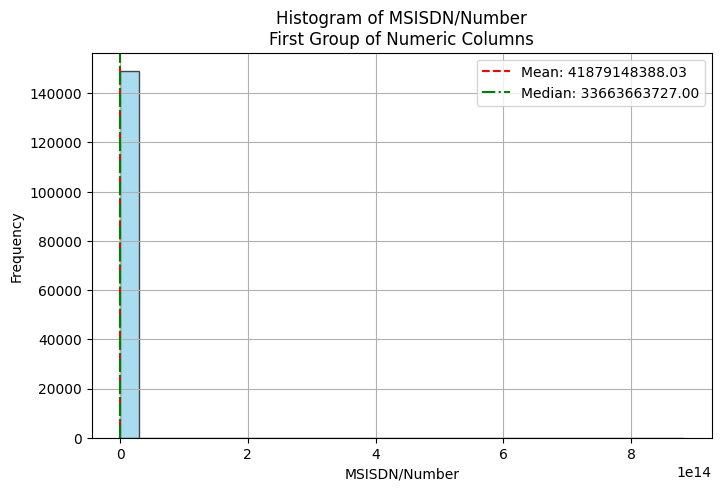

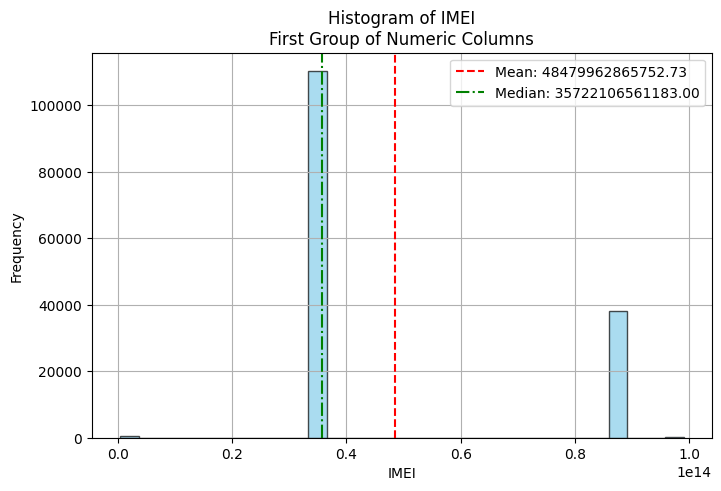

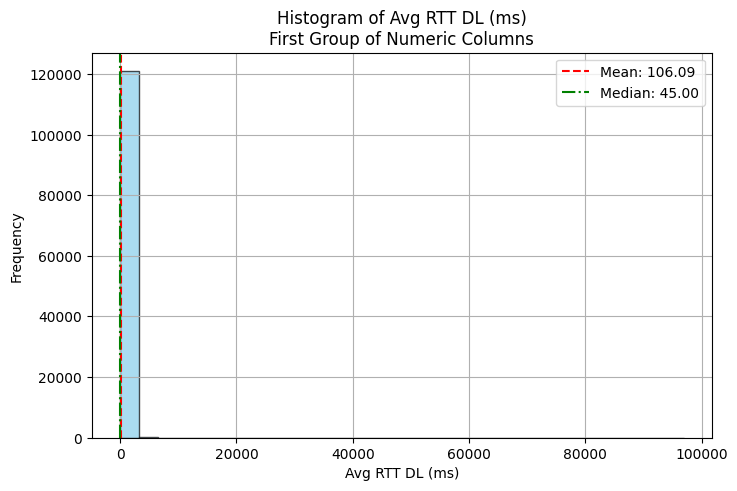

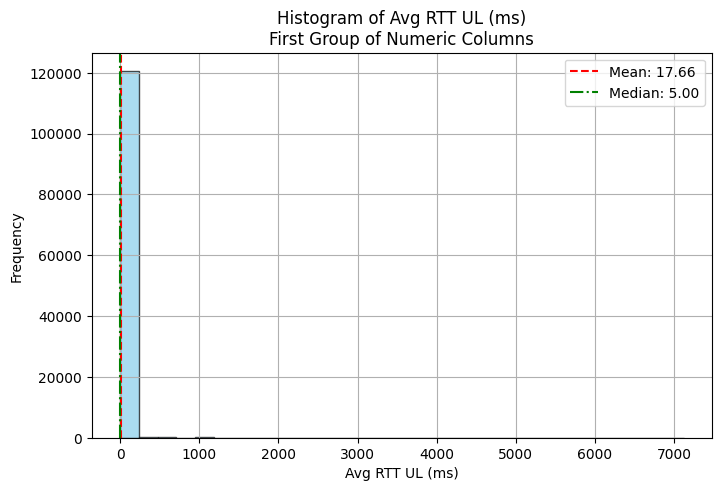

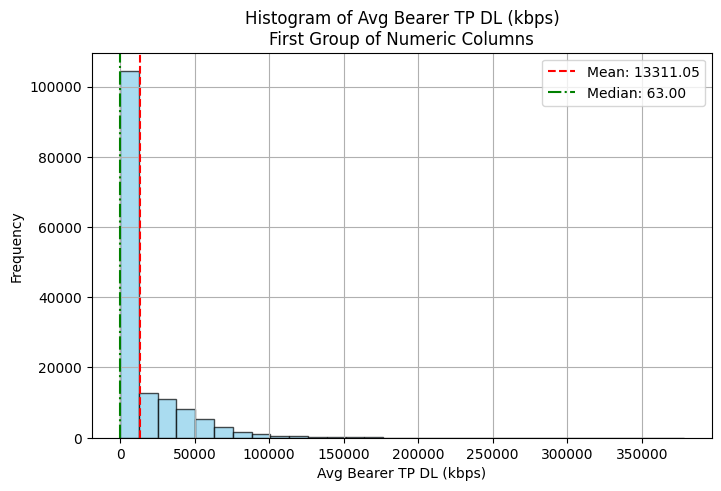

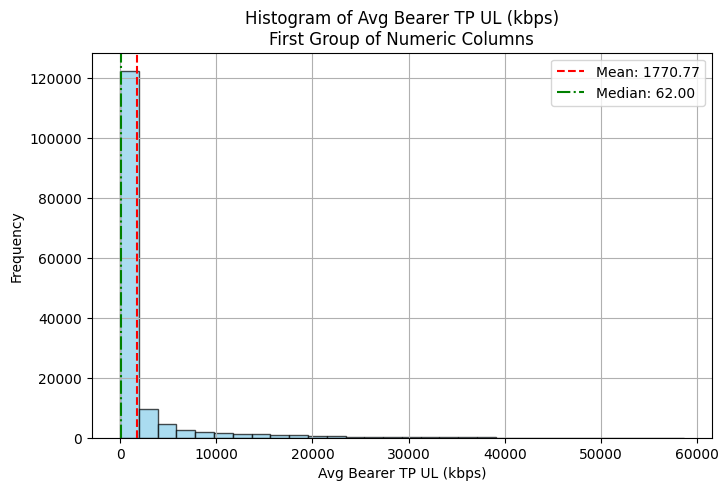

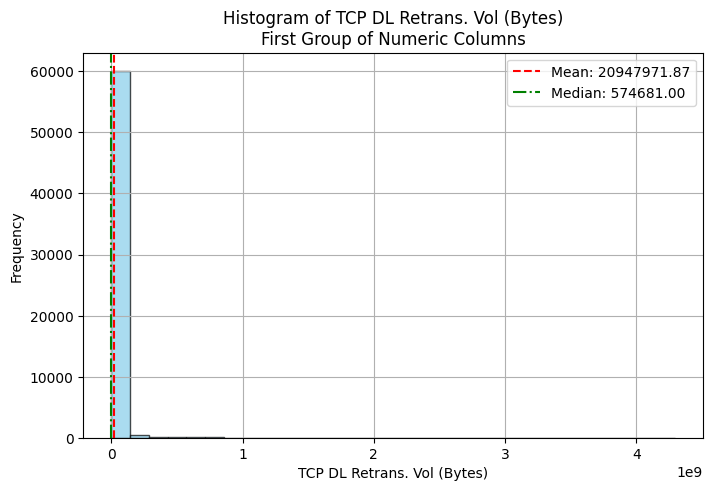

Skewness for Second Group of Numeric Columns:
TCP UL Retrans. Vol (Bytes)       83.543522
DL TP < 50 Kbps (%)               -2.298652
50 Kbps < DL TP < 250 Kbps (%)     3.273531
250 Kbps < DL TP < 1 Mbps (%)      4.571647
DL TP > 1 Mbps (%)                 5.361151
UL TP < 10 Kbps (%)               -8.985650
10 Kbps < UL TP < 50 Kbps (%)     10.946637
50 Kbps < UL TP < 300 Kbps (%)    21.832772
UL TP > 300 Kbps (%)              36.150531
HTTP DL (Bytes)                   38.738557
HTTP UL (Bytes)                   32.303786
Activity Duration DL (ms)          5.857531
dtype: float64


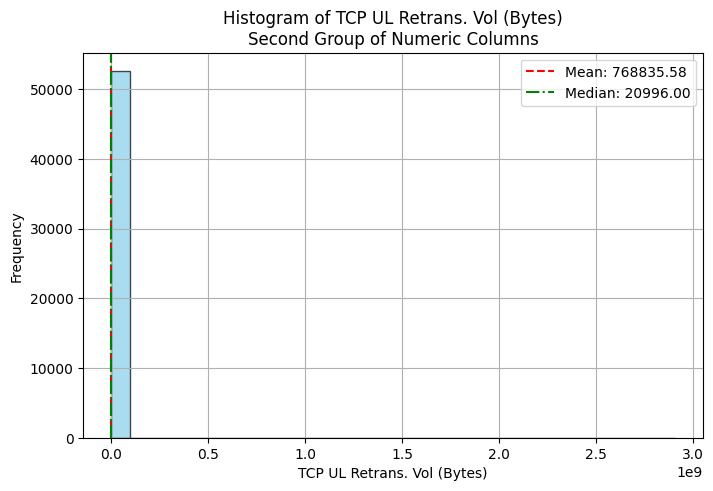

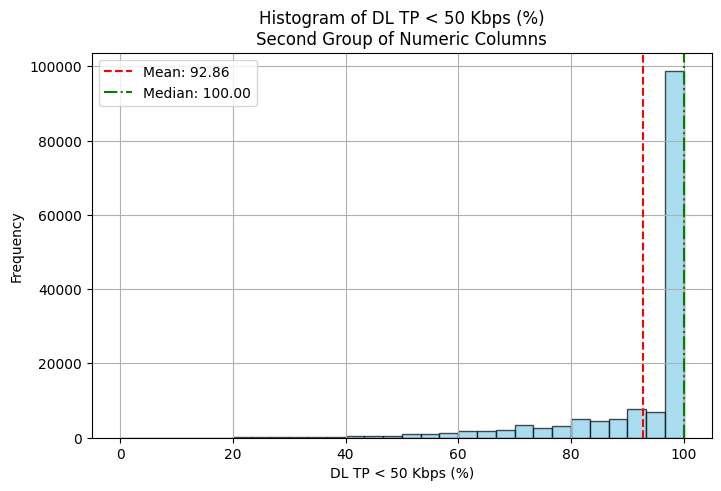

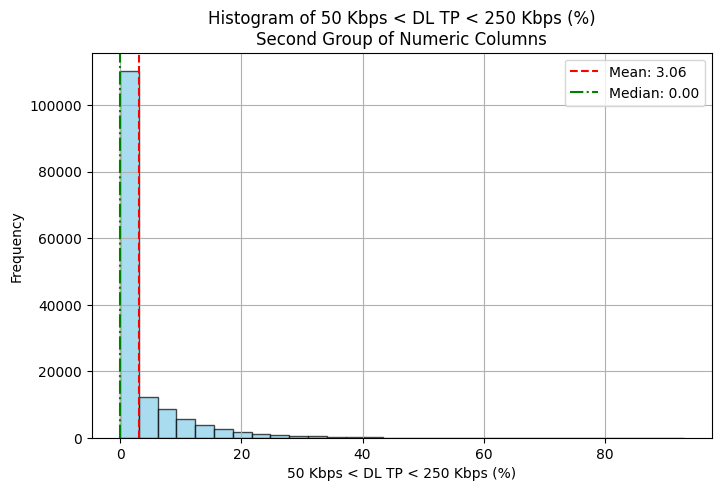

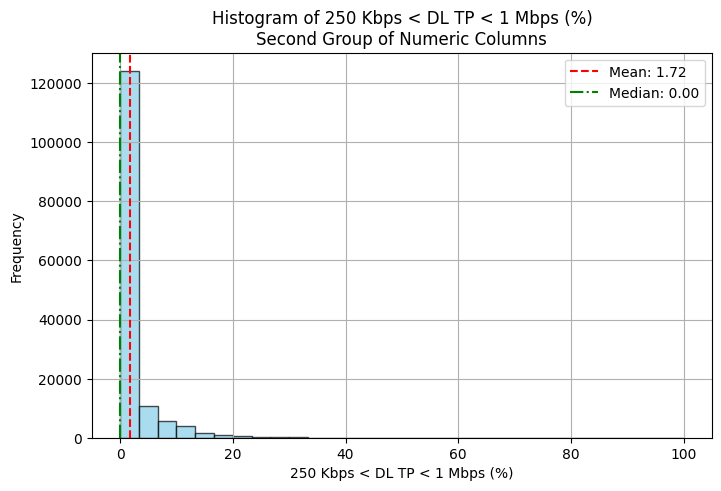

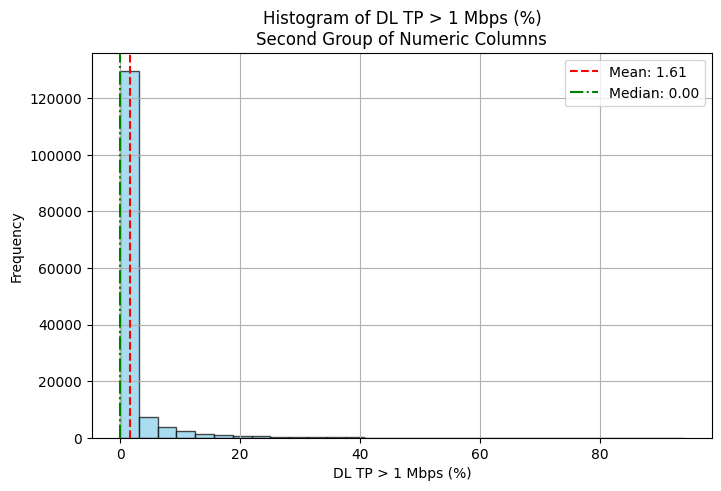

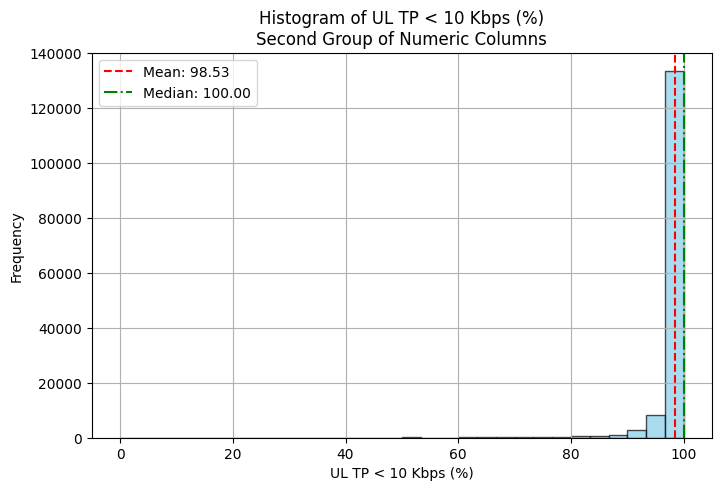

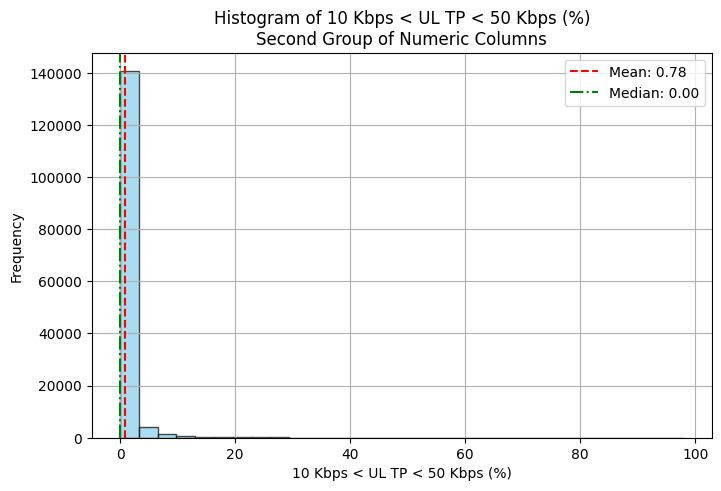

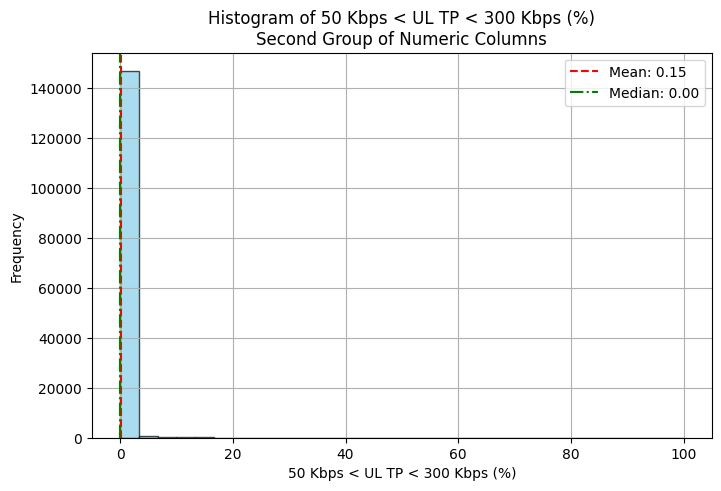

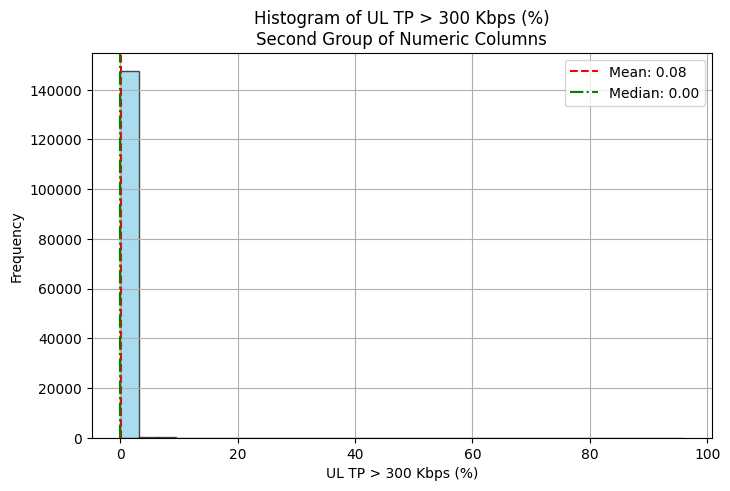

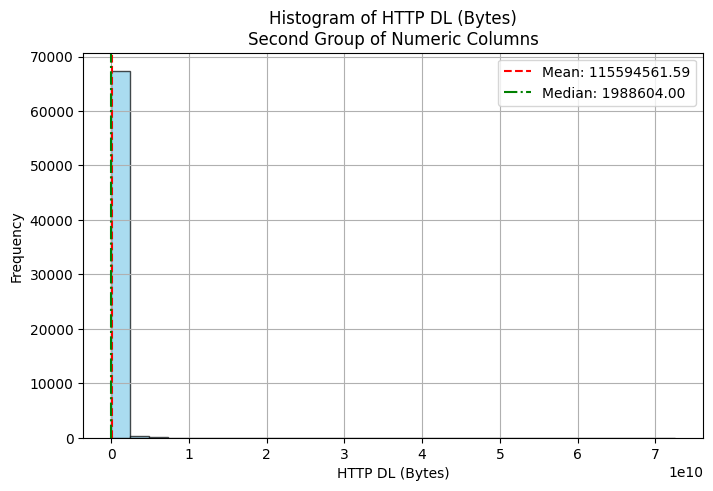

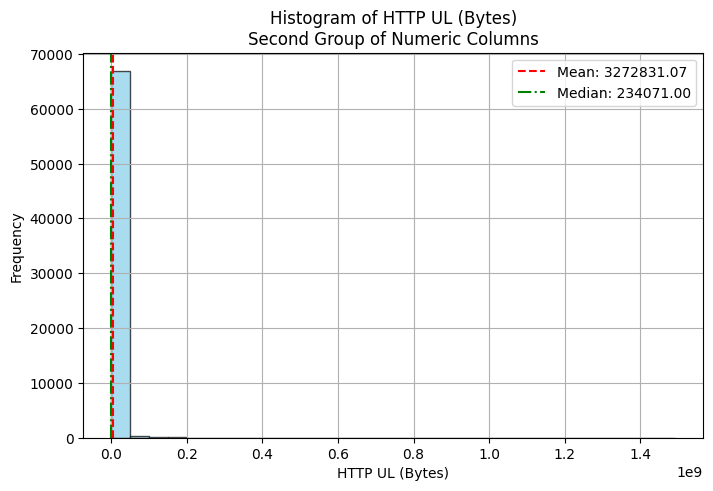

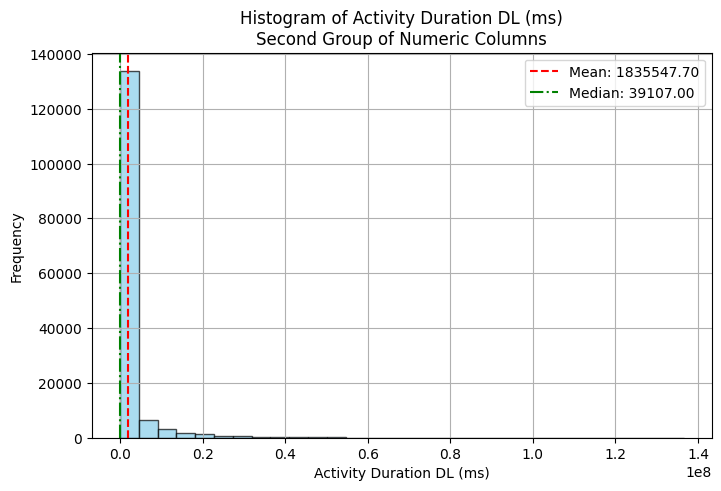

Skewness for Third Group of Numeric Columns:
Activity Duration UL (ms)                    7.365204
Dur. (ms).1                                  3.963365
Nb of sec with 125000B < Vol DL              6.567050
Nb of sec with 1250B < Vol UL < 6250B       21.956888
Nb of sec with 31250B < Vol DL < 125000B     6.588063
Nb of sec with 37500B < Vol UL              21.500723
Nb of sec with 6250B < Vol DL < 31250B       6.871164
Nb of sec with 6250B < Vol UL < 37500B      19.571475
Nb of sec with Vol DL < 6250B                9.027615
Nb of sec with Vol UL < 1250B                7.484437
Social Media DL (Bytes)                     -0.002051
Social Media UL (Bytes)                     -0.000359
Google DL (Bytes)                           -0.008323
Google UL (Bytes)                            0.002019
Email DL (Bytes)                            -0.002458
Email UL (Bytes)                             0.006944
dtype: float64


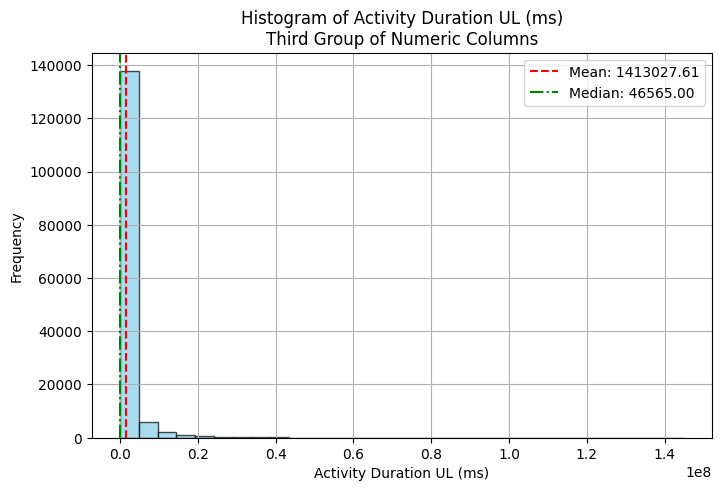

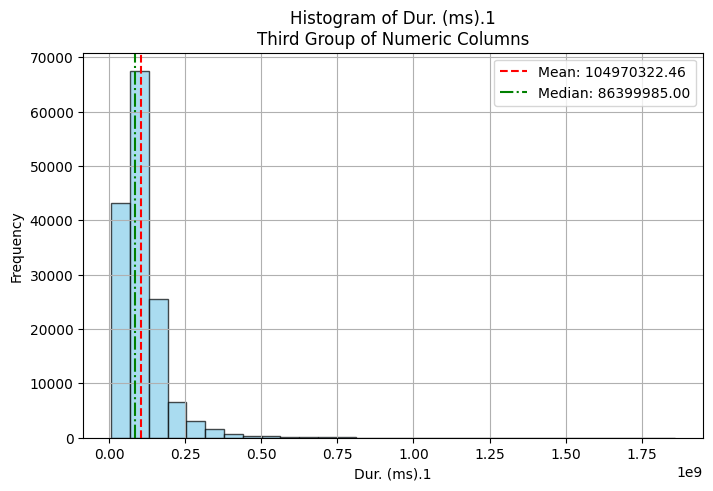

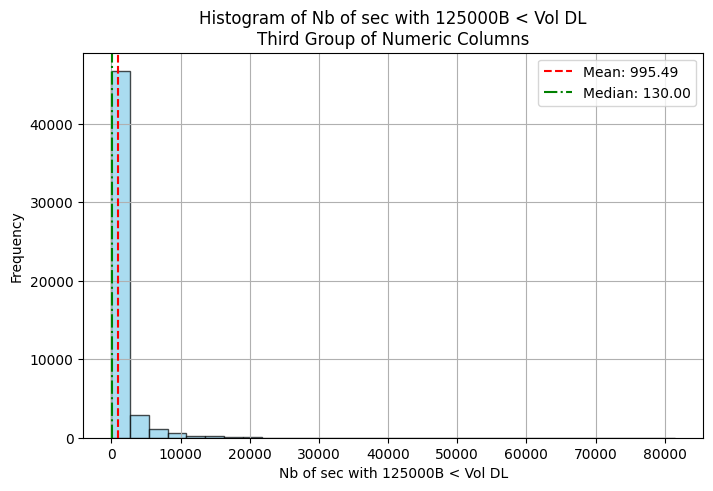

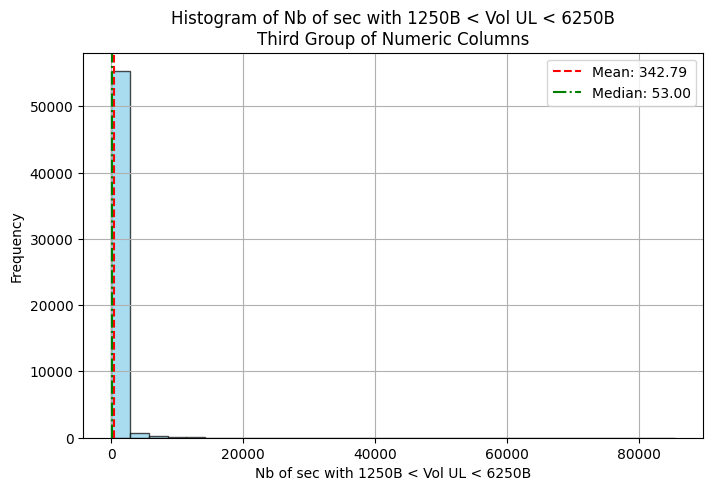

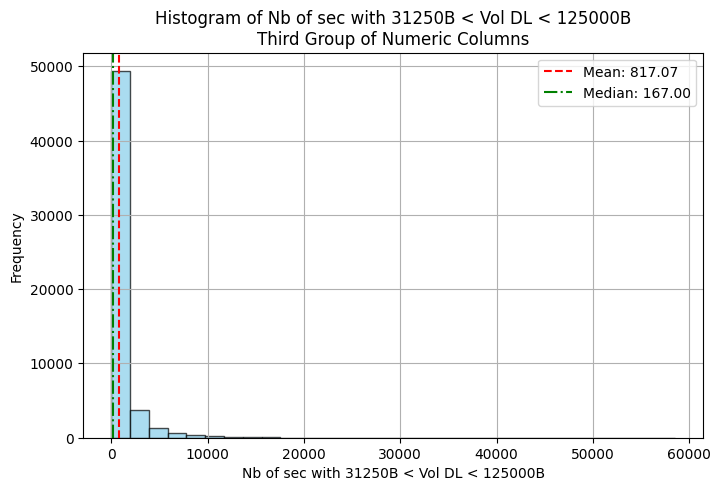

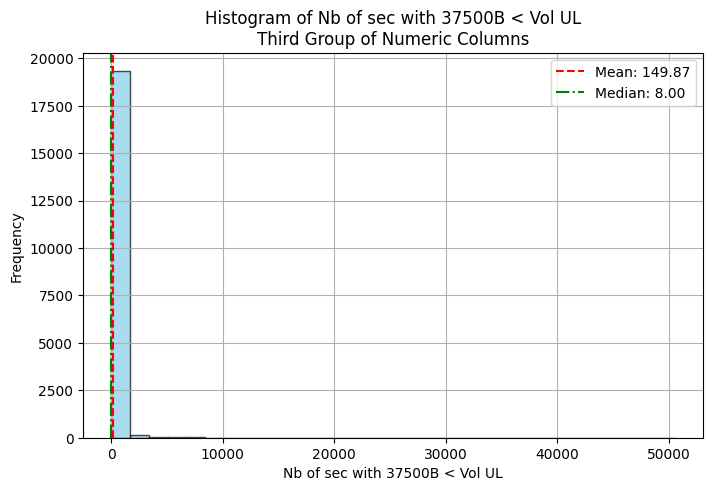

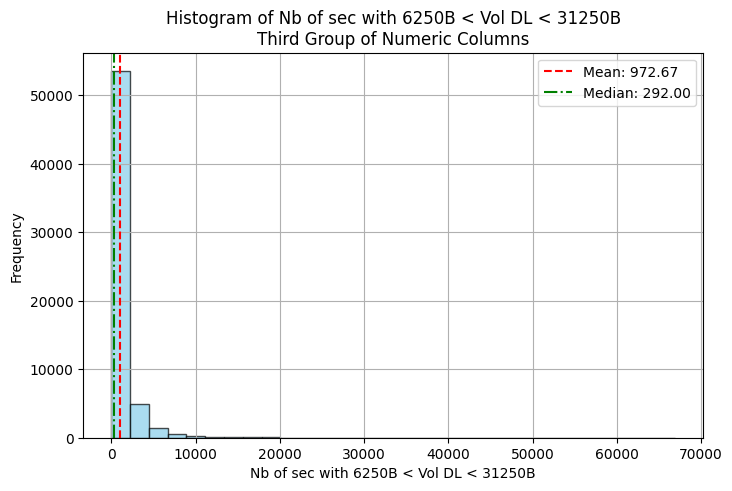

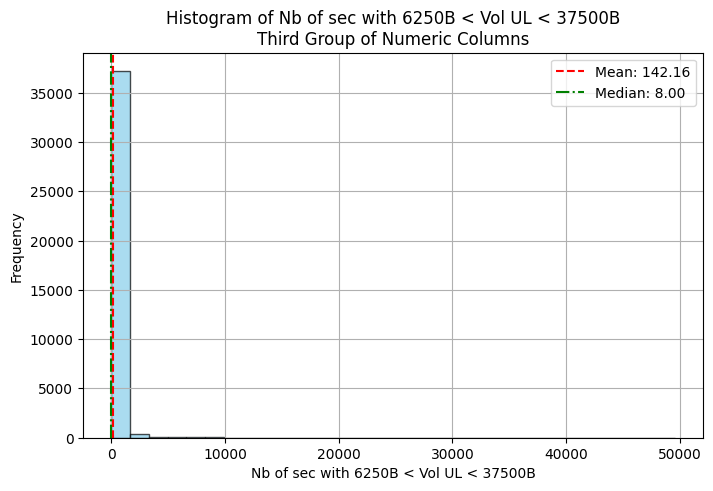

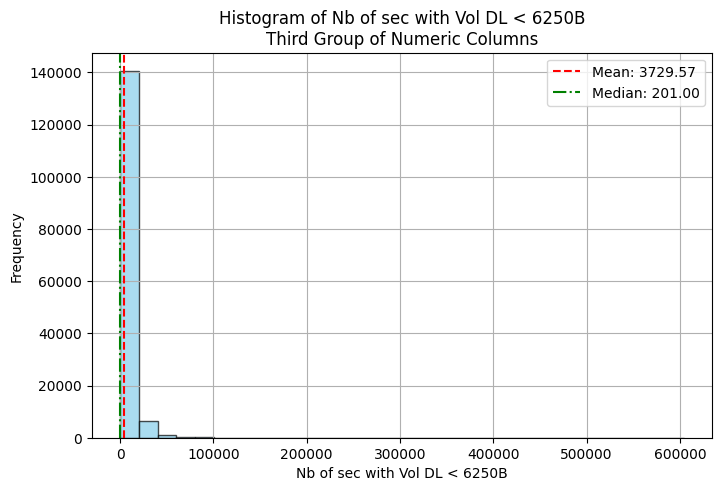

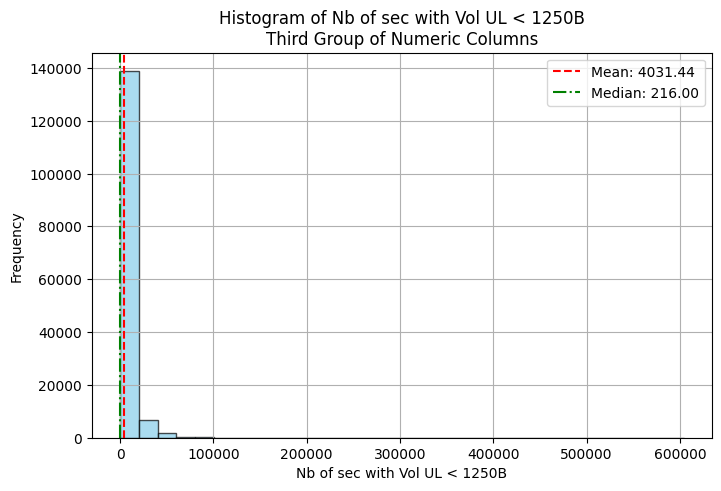

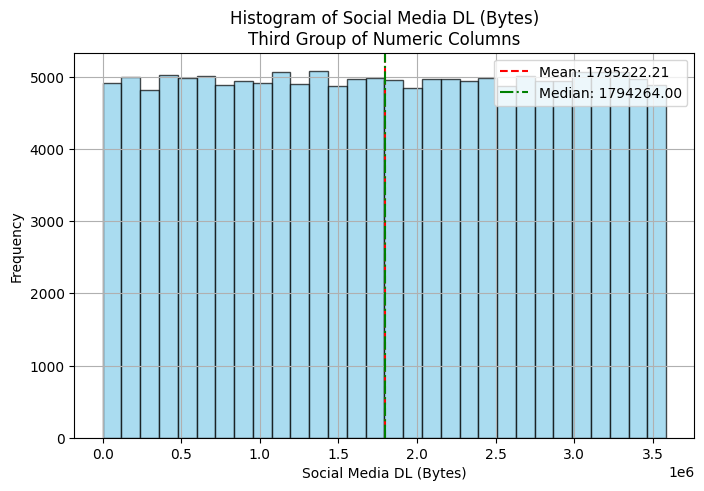

In [ ]:
plot.analyze_numeric_columns(df)

In [ ]:
df.dropna(inplace=True)

### Distribution of Outlier

In [58]:
outliers = eda.check_outliers()
outliers

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142514,7.349883e+18,4/29/2019 4:32,461.0,4/30/2019 16:56,418.0,131003.0,2.082015e+14,3.369842e+10,8.690980e+13,D50549B,...,12771344.0,20091617.0,10623504.0,21769536.0,760997630.0,15484064.0,731001647.0,13786362.0,75649033.0,790107607.0
145415,7.349883e+18,4/29/2019 6:09,784.0,4/30/2019 13:55,817.0,114369.0,2.082014e+14,3.362786e+10,3.557951e+13,T16786A,...,8094060.0,2220735.0,12373161.0,1851472.0,149814650.0,1278601.0,23644200.0,2036029.0,9424189.0,181198644.0
145847,1.311448e+19,4/29/2019 6:22,319.0,4/30/2019 9:36,250.0,98046.0,2.082018e+14,3.368702e+10,8.627420e+13,D72336C,...,2871802.0,20791143.0,10696723.0,19102758.0,3907694.0,16226668.0,149337845.0,16017247.0,73407090.0,24841143.0
147062,1.311448e+19,4/29/2019 6:48,22.0,4/30/2019 9:41,476.0,96759.0,2.082014e+14,3.366009e+10,3.530251e+13,T70061B,...,3740296.0,542096.0,356961.0,59834.0,475832947.0,1202261.0,39415457.0,5018073.0,7977668.0,488300067.0


In [60]:
# df.shape

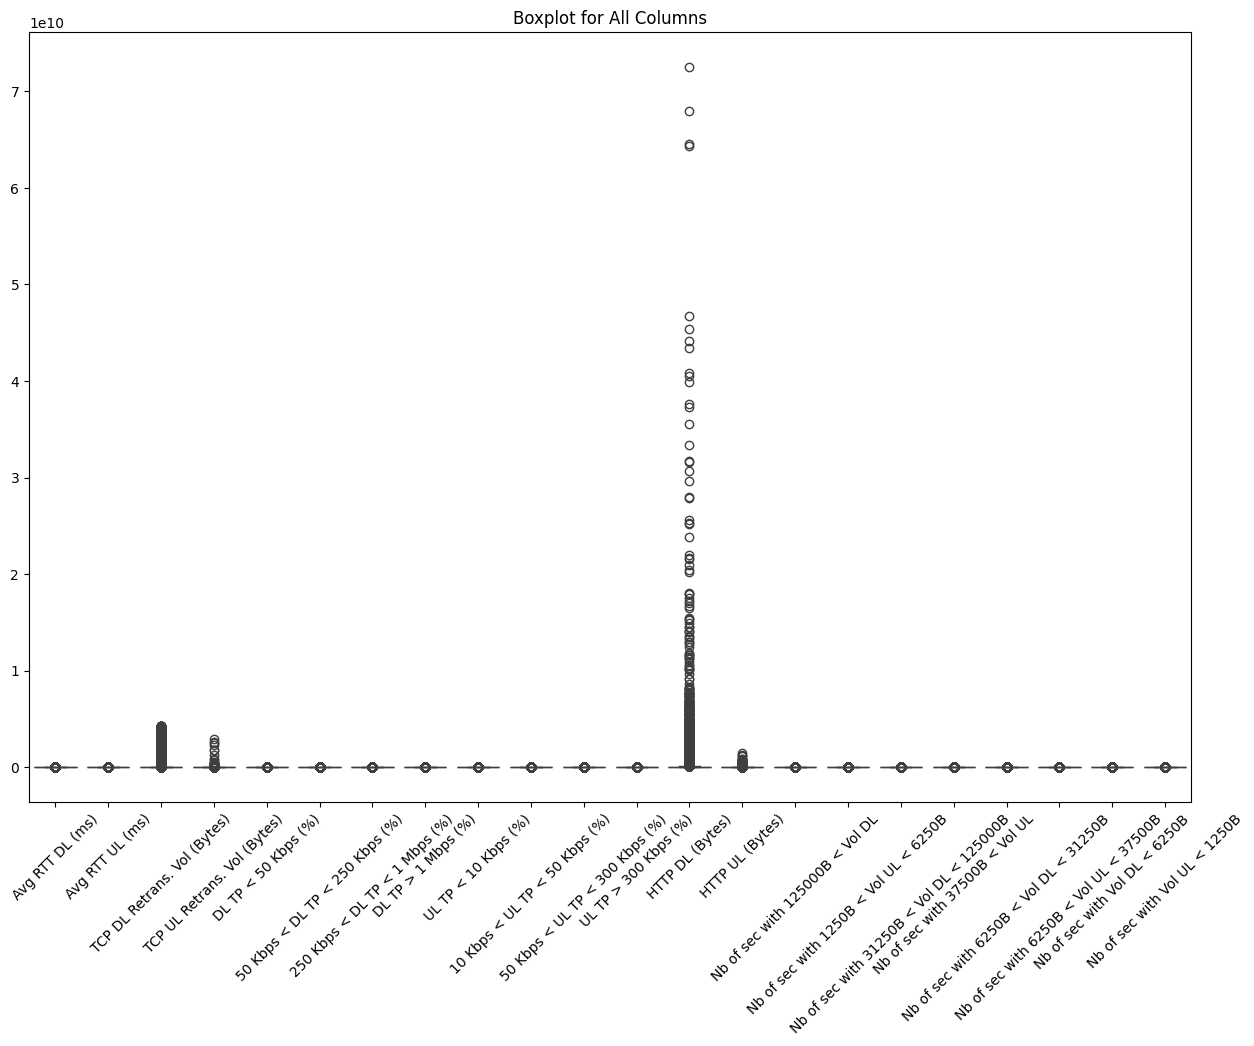

In [57]:
# Boxplots to visualize outliers
def visualized_outliers(df):
    plt.figure(figsize=(15, 10))
    sns.boxplot(data=df)
    plt.xticks(rotation=45)
    plt.title("Boxplot for All Columns")
    plt.show()
visualized_outliers(df[null_columns_greater_than_0])

In [72]:
def drop_outliers(df, columns, threshold=1.5):
    """
    Removes outliers from the specified columns using the IQR method.

    Parameters:
    df (DataFrame): The input dataframe.
    columns (list): List of numeric column names to check for outliers.
    threshold (float): The IQR multiplier (default is 1.5).

    Returns:
    DataFrame: A new dataframe with outliers removed.
    """
    df_clean = df.copy()  # Create a copy to avoid modifying the original data

    for col in columns:
        if col in df_clean.select_dtypes(include=['number']).columns:
            Q1 = df_clean[col].quantile(0.02)
            Q3 = df_clean[col].quantile(0.98)
            IQR = Q3 - Q1

            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR

            df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
        else:
            print(f"Skipping '{col}' as it's not a numeric column.")

    return df_clean


In [73]:
numeric_columns = df.select_dtypes(include=['number']).columns  # Select numeric columns
df_cleaned = drop_outliers(df, numeric_columns)

In [89]:
import pandas as pd

def drop_1_percent_outliers(df, columns):
    """
    Removes the top and bottom 1% outliers from the specified columns.

    Parameters:
    df (DataFrame): The input dataframe.
    columns (list): List of numeric column names to check for outliers.

    Returns:
    tuple: (cleaned DataFrame, removed outliers DataFrame)
    """
    df_clean = df.copy()  # Preserve original data
    df_outliers = pd.DataFrame(columns=df.columns)  # Store outliers

    for col in columns:
        if col in df_clean.select_dtypes(include=['number']).columns:
            # Calculate the 1st and 99th percentiles
            lower_bound = df_clean[col].quantile(0.01)  # Bottom 1%
            upper_bound = df_clean[col].quantile(0.99)  # Top 1%

            # Identify outliers
            outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
            
            # Store outliers
            df_outliers = pd.concat([df_outliers, outliers]).drop_duplicates() if not outliers.empty else df_outliers

            # Remove outliers from main DataFrame
            df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
        else:
            print(f"Skipping '{col}' as it's not a numeric column.")

    return df_clean, df_outliers

# Example usage
numeric_columns = df.select_dtypes(include=['number']).columns  # Select numeric columns
df_cleaned, df_outliers = drop_1_percent_outliers(df, numeric_columns)

# ✅ Verify results
print(f"Original data shape: {df.shape}")
print(f"Cleaned data shape: {df_cleaned.shape}")  # After outlier removal
print(f"Outliers removed: {df_outliers.shape}")  # Number of outliers identified

# Optional: Save outliers for future reference
# df_outliers.to_csv("removed_outliers.csv", index=False)
# df_cleaned.to_csv("cleaned_data.csv", index=False)


C:\Users\Admin\AppData\Local\Temp\ipykernel_12164\289537643.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_outliers = pd.concat([df_outliers, outliers]).drop_duplicates() if not outliers.empty else df_outliers


Original data shape: (148999, 55)
Cleaned data shape: (7110, 55)
Outliers removed: (38565, 55)


Bearer Id: 1st Percentile = 6.91753768582057e+18, 99th Percentile = 1.31144835731514e+19
Start ms: 1st Percentile = 10.0, 99th Percentile = 990.0
End ms: 1st Percentile = 9.0, 99th Percentile = 989.0
Dur. (ms): 1st Percentile = 12621.98, 99th Percentile = 399771.4199999998
IMSI: 1st Percentile = 208200312734207.47, 99th Percentile = 208209850611094.0
MSISDN/Number: 1st Percentile = 33603879504.74, 99th Percentile = 33784062610.78
IMEI: 1st Percentile = 35155509996817.66, 99th Percentile = 86948003324762.64
Avg RTT DL (ms): 1st Percentile = 15.0, 99th Percentile = 1159.0
Avg RTT UL (ms): 1st Percentile = 0.0, 99th Percentile = 162.0
Avg Bearer TP DL (kbps): 1st Percentile = 6.0, 99th Percentile = 103245.3799999998
Avg Bearer TP UL (kbps): 1st Percentile = 3.0, 99th Percentile = 23490.01999999999
TCP DL Retrans. Vol (Bytes): 1st Percentile = 82.0, 99th Percentile = 295965073.6099992
TCP UL Retrans. Vol (Bytes): 1st Percentile = 48.0, 99th Percentile = 5464726.999999955
DL TP < 50 Kbps (%

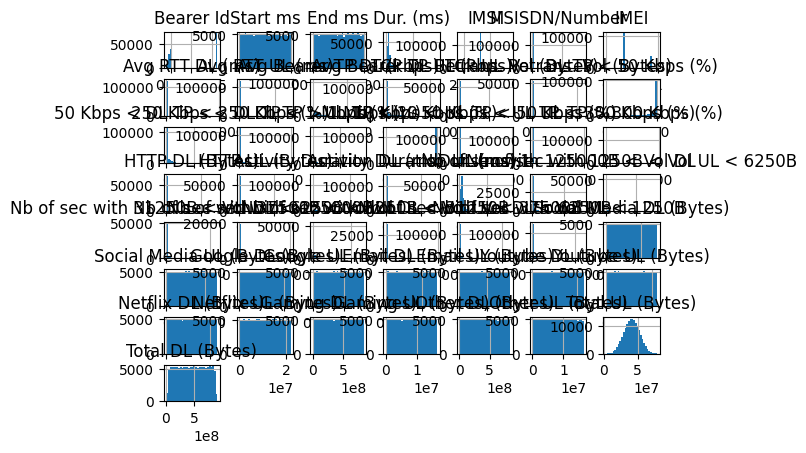

In [91]:
# Check 1st and 99th percentiles for each numeric column
for col in df.select_dtypes(include=['number']).columns:
    lower_bound = df[col].quantile(0.01)
    upper_bound = df[col].quantile(0.99)
    print(f"{col}: 1st Percentile = {lower_bound}, 99th Percentile = {upper_bound}")

# Optionally, visualize a histogram to check distribution
import matplotlib.pyplot as plt
df[numeric_columns].hist(bins=30)
plt.axvline(lower_bound, color='red', linestyle='--', label='1st Percentile')
plt.axvline(upper_bound, color='red', linestyle='--', label='99th Percentile')
plt.legend()
plt.show()


In [84]:
df_cleaned.shape

(16699, 55)

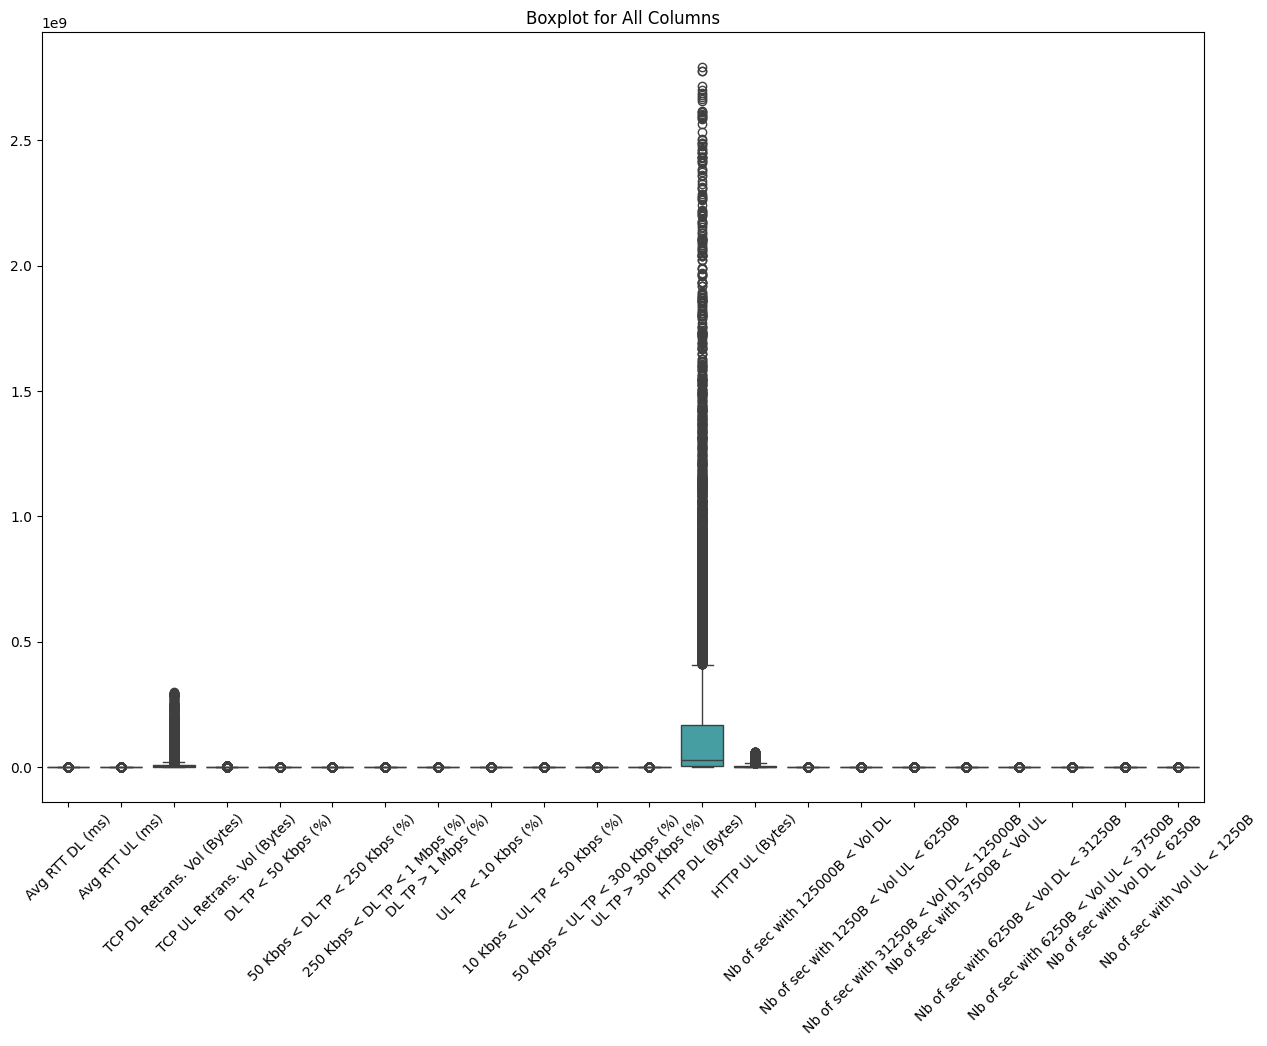

In [75]:
visualized_outliers(df_cleaned[null_columns_greater_than_0])